In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
data= pd.read_csv('avocado.csv', index_col=0)
print(data.shape)
data.head()

(18249, 13)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [100]:
data['Date']= pd.to_datetime(data['Date'])
data= data.set_index('Date')

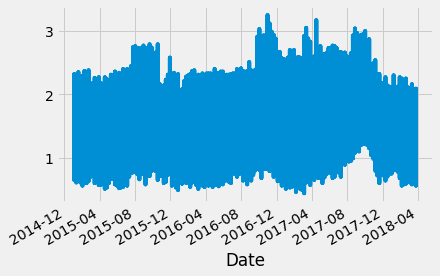

In [101]:
plt.style.use('fivethirtyeight')
data['AveragePrice'].plot()

## Split Data 

In [103]:
#Since this is time series, we can't do random shuffling, order matters
test_len= int(len(data)*0.2)

train= data.head(len(data)-test_len)
test= data.tail(test_len)

print(train.shape, test.shape)

((14600, 12), (3649, 12))


## Traditional Time Series Methods

Let's first try some of the original methods used for this. <strong>AR, MA, ARMA</strong>, and <strong>ARIMA</strong> methods.

In [104]:
from statsmodels.tsa.stattools import adfuller

adfuller(train['AveragePrice'])

(-7.373579052892601,
 8.841150992113203e-11,
 42,
 14557,
 {'1%': -3.4307992995464076,
  '10%': -2.5668756943714763,
  '5%': -2.8617385705190346},
 -13479.70714318622)

## Neural Nets

This is from the udacity course.

In [4]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time

Using TensorFlow backend.
//anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
X_train, y_train, X_test, y_test= lstm.load_data('sp500.csv', 50, True)

In [6]:
#Build model

model= Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100,
               return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('linear'))

start= time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('Compilation time: ', time.time() - start)


('Compilation time: ', 0.028184890747070312)


In [7]:
#Train the model

model.fit(
    X_train,
    y_train, 
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 10s - loss: 0.0053 - val_loss: 9.5447e-04


yo


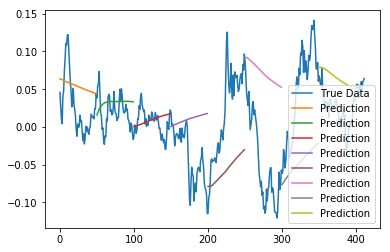

In [8]:
# Make predictions

predictions= lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)